# Tips Adlı Veri Setini İnceleme 

In [1]:
import seaborn as sns 
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
tips = sns.load_dataset("tips")
df = tips.copy()

In [3]:
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.4 KB


In [5]:
df.isnull().sum()

total_bill    0
tip           0
sex           0
smoker        0
day           0
time          0
size          0
dtype: int64

In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
total_bill,244.0,19.785943,8.902412,3.07,13.3475,17.795,24.1275,50.81
tip,244.0,2.998279,1.383638,1.00,2.0000,2.900,3.5625,10.00
size,244.0,2.569672,0.951100,1.00,2.0000,2.000,3.0000,6.00


## Katogorik değişkenlere ve aralarında ilişkiye baktık 
* Aklımıza gelen ilk soru acaba bahişiş miktarını etkileyen faktörler nelerdir 

In [7]:
df["smoker"].value_counts()

smoker
No     151
Yes     93
Name: count, dtype: int64

In [9]:
df["sex"].value_counts()

sex
Male      157
Female     87
Name: count, dtype: int64

In [10]:
df[["smoker","sex"]].value_counts()

smoker  sex   
No      Male      97
Yes     Male      60
No      Female    54
Yes     Female    33
Name: count, dtype: int64

In [12]:
df["day"].value_counts()

day
Sat     87
Sun     76
Thur    62
Fri     19
Name: count, dtype: int64

In [13]:
df[["day", "time"]].value_counts()

day   time  
Sat   Dinner    87
Sun   Dinner    76
Thur  Lunch     61
Fri   Dinner    12
      Lunch      7
Thur  Dinner     1
Name: count, dtype: int64

In [9]:
df.groupby("sex", observed = True)["tip"].mean() # Cinsiyete Göre Verilen Bahşişlerin Ortalaması

sex
Male      3.089618
Female    2.833448
Name: tip, dtype: float64

## Bahşiş Miktarını etkileyen Faktörler 

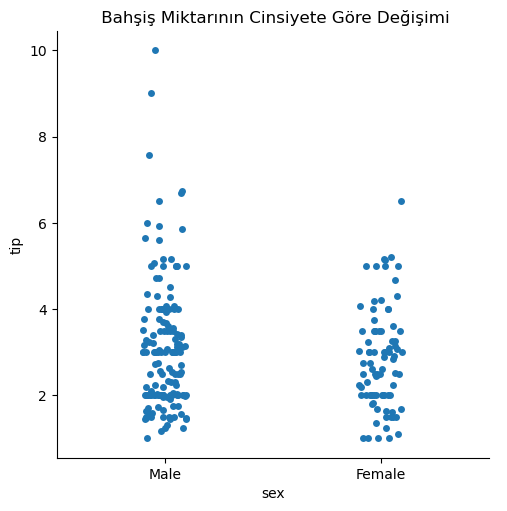

In [26]:
sns.catplot(x ="sex" , y ="tip" , data = df);
plt.title(" Bahşiş Miktarının Cinsiyete Göre Değişimi")
plt.show()

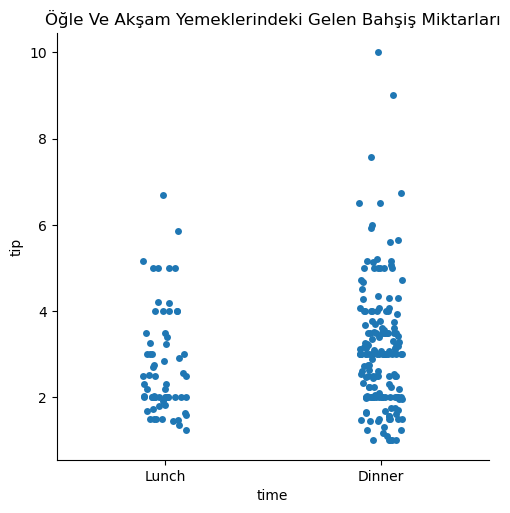

In [29]:
sns.catplot(x = "time",y ="tip",data = df);
plt.title("Öğle Ve Akşam Yemeklerindeki Gelen Bahşiş Miktarları")
plt.show()

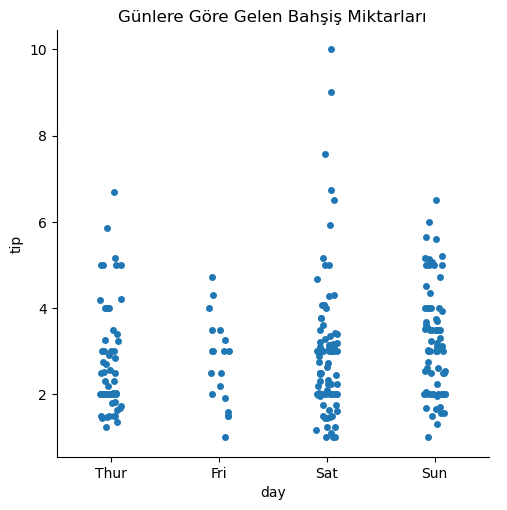

In [32]:
sns.catplot(x = "day",y ="tip",data = df);
plt.title("Günlere Göre Gelen Bahşiş Miktarları")
plt.show()

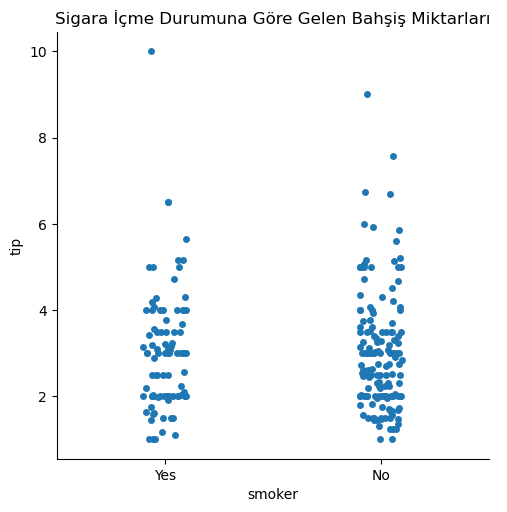

In [33]:
sns.catplot(x = "smoker",y ="tip",data = df);
plt.title("Sigara İçme Durumuna Göre Gelen Bahşiş Miktarları")
plt.show()

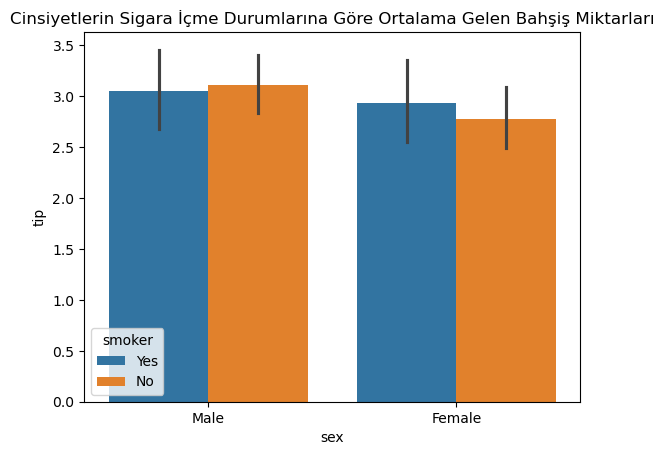

In [54]:
sns.barplot(x = "sex", y = "tip", hue = "smoker", data = df);
plt.title("Cinsiyetlerin Sigara İçme Durumlarına Göre Ortalama Gelen Bahşiş Miktarları")
plt.show()

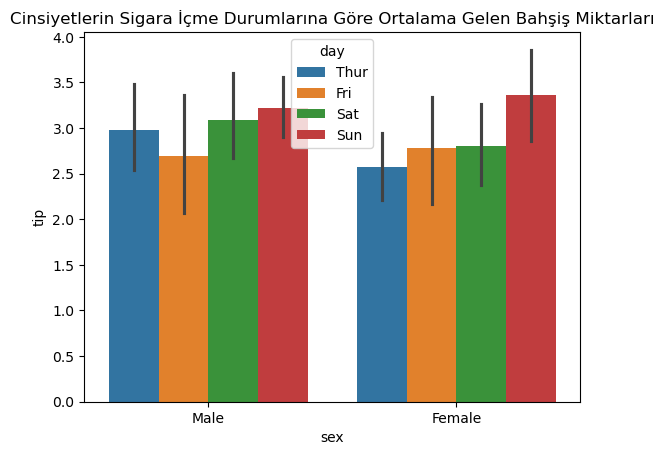

In [5]:
sns.barplot(x = "sex", y = "tip", hue = "day", data = df);
plt.title("Cinsiyetlerin Sigara İçme Durumlarına Göre Ortalama Gelen Bahşiş Miktarları")
plt.show()

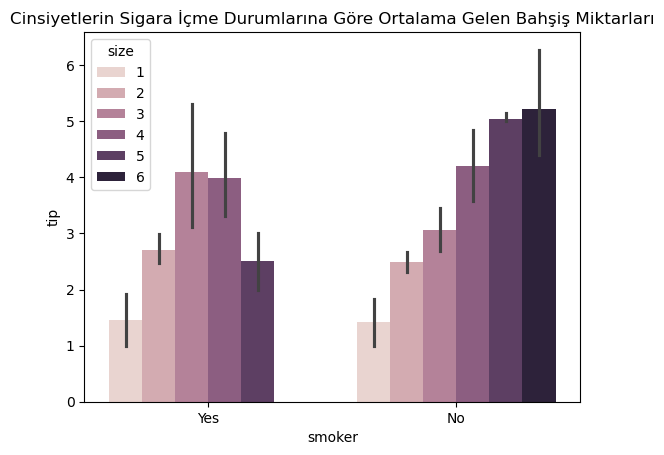

In [13]:
sns.barplot(x = "smoker", y = "tip", hue = "size", data = df);
plt.title("Cinsiyetlerin Sigara İçme Durumlarına Göre Ortalama Gelen Bahşiş Miktarları")
plt.show()

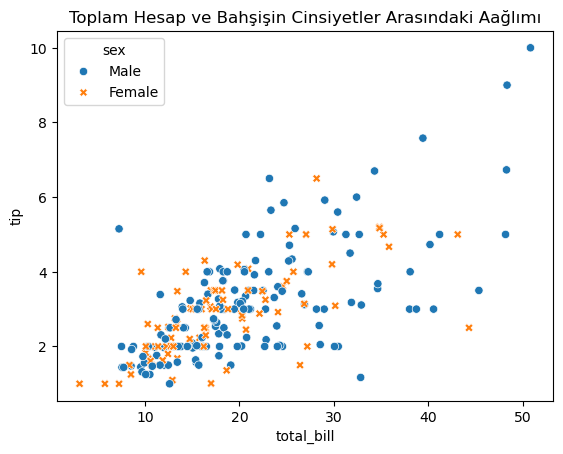

In [4]:
sns.scatterplot(data = df, x = "total_bill", y = "tip", hue = "sex", style= "sex");
plt.title("Toplam Hesap ve Bahşişin Cinsiyetler Arasındaki Aağlımı")
plt.show()

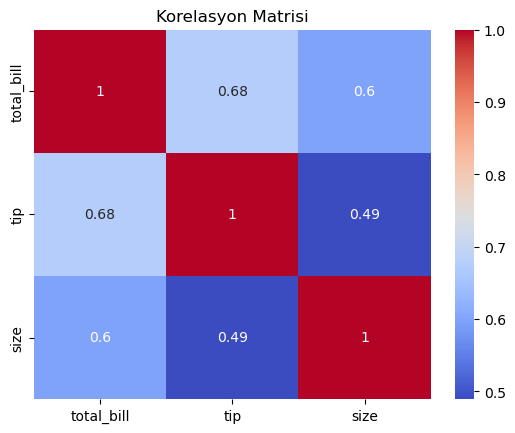

In [11]:
sns.heatmap(df.corr(numeric_only = True), annot = True, cmap = "coolwarm");
plt.title("Korelasyon Matrisi")
plt.show()

## Bahşiş Oranı 

In [15]:
df["Bahsis_Orani"] = (df.tip / df.total_bill) * 100
df[["Bahsis_Orani", "tip", "total_bill"]].head()

,Bahsis_Orani,tip,total_bill
0,5.944673,1.01,16.99
1,16.054159,1.66,10.34
2,16.658734,3.50,21.01
3,13.978041,3.31,23.68
4,14.680765,3.61,24.59


In [16]:
df.groupby("Bahsis_Orani")[["tip","total_bill"]].mean()

,tip,total_bill
Bahsis_Orani,,
3.563814,1.17,32.83
5.643341,2.50,44.30
5.679667,1.50,26.41
5.944673,1.01,16.99
6.565988,2.00,30.46
...,...,...
28.053517,6.50,23.17
29.198966,3.39,11.61
32.573290,1.00,3.07


# Tips Verisinin İncelemlerini Yaptık Şimdi İse Tip Değerini Tahmin Eden Bir Uygulama Yapalım

In [19]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
df.head()

,total_bill,tip,sex,smoker,day,time,size,Bahsis_Orani
0,16.99,1.01,Female,No,Sun,Dinner,2,5.944673
1,10.34,1.66,Male,No,Sun,Dinner,3,16.054159
2,21.01,3.50,Male,No,Sun,Dinner,3,16.658734
3,23.68,3.31,Male,No,Sun,Dinner,2,13.978041
4,24.59,3.61,Female,No,Sun,Dinner,4,14.680765


In [20]:
# Hedef Değişken 
y = df["tip"]

# Girdi değişkenleri (katagorik + sayısal)
x = df.drop("tip", axis=1)

In [21]:
# Katagorik Ve Sayısal Değişkenlerin belirlenmesi
numeric_features = ["total_bill","size","Bahsiz_Orani"]
categorical_features = ["sex","smoker","day","time"]

## Pipeline oluştur

In [22]:
# Kategorik veriler için OneHotEncoder tanımla  
# yani katagorik değişkenleri sayısal değere dönüştür
categorical_transformer = OneHotEncoder(drop="first") #First ilk katagorik değişkeni atar
# örneğin sadece female kalır o da 0 ise female değil 1 ise female olarak tutar 

In [31]:
# Sütun dönüştürücü: kategorik ve sayısalları birleştir
preprocessor = ColumnTransformer(
    transformers=[
        ("cat", categorical_transformer, categorical_features)
    ],
    remainder="passthrough", # Sayısal sütunları olduğu gibi ekle
    verbose_feature_names_out=False,  # daha okunaklı sütun isimleri
    force_int_remainder_cols=False    # İsimlerle tut, uyarıyı da sustur    
)

In [32]:
# Pipeline oluştur: Ön işleme + Regresyon Modeli
model = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("regressor", LinearRegression())
])

# Veriyi Eğitim Ve Test Olarak Ayır

In [59]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)

## 📌 train_test_split(...)
Bu fonksiyon, X (bağımsız değişkenler / input features) ve y (bağımlı değişken / hedef değişken) verilerini rastgele şekilde ikiye böler:

Eğitim verisi (Training set): Modelin öğrenmesi için kullanılır.

Test verisi (Test set): Modelin öğrendiklerini test etmek, yani performansını değerlendirmek için kullanılır.

## Modeli eğit

In [60]:
model.fit(x_train,y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(force_int_remainder_cols=False,
                                   remainder='passthrough',
                                   transformers=[('cat',
                                                  OneHotEncoder(drop='first'),
                                                  ['sex', 'smoker', 'day',
                                                   'time'])],
                                   verbose_feature_names_out=False)),
                ('regressor', LinearRegression())])

## Tahmin yap ve başarıyı ölç

In [61]:
y_pred = model.predict(x_test)
print("MSE: ", mean_squared_error(y_test, y_pred))
print("R2: ", r2_score(y_test,y_pred))

MSE:  0.15182643271025364
R2:  0.9211508532345293


✅ Açıklama:
Bu satırda, daha önce Pipeline ile oluşturduğun model'in, test verileri (X_test) üzerinde tahmin yaptığı adım yer alıyor.

Detaylı olarak:
model bir Pipeline nesnesidir. İçinde şu iki adım bulunur:

Önişleme (preprocessor): OneHotEncoder gibi dönüşümler.

Tahmin modeli: Örneğin bir LinearRegression ya da başka bir regresyon modeli.

predict(X_test) fonksiyonu, test verilerini önce preprocessor ile işler, ardından regresyon modeli bu işlenmiş verileri kullanarak tahmin yapar.

Tahmin sonuçları y_pred adlı bir değişkende saklanır.

y_pred: Modelin tahmin ettiği hedef değerlerdir (bağımlı değişken).

📏 Kod:
python
Kodu kopyala
print("MSE:", mean_squared_error(y_test, y_pred))
✅ Açıklama:
Bu satır, Mean Squared Error (Ortalama Kare Hatası) değerini hesaplar ve ekrana yazdırır.

Detaylı olarak:
y_test: Gerçek (doğru) etiketlerdir.

y_pred: Modelin tahmin ettiği etiketlerdir.

mean_squared_error(...): Bu iki küme arasındaki farkın karelerinin ortalamasını alır.

MSE neyi gösterir?

Tahminlerin ne kadar hatalı olduğunu sayısal olarak gösterir.

Değeri 0’a ne kadar yakınsa, modelin tahminleri gerçek değerlere o kadar yakındır.

Birimi, hedef değişkenin karesine göredir (örneğin hedef değişken TL ise, MSE birimi TL² olur).

📈 Kod:
python
Kodu kopyala
print("R²  :", r2_score(y_test, y_pred))
✅ Açıklama:
Bu satır, modelin doğruluk oranını ölçen R-kare (R²) skorunu hesaplar.

Detaylı olarak:
r2_score(...): Regresyon modelinin ne kadar başarılı olduğunu ölçmek için kullanılır.

R² skoru nedir?

Değer aralığı genellikle -∞ ile 1 arasındadır.

1 → Mükemmel tahmin (model %100 doğru tahmin ediyor).

0 → Model, hiçbir işe yaramıyor demek (ortalama değer kadar bile tahmin edememiş).

Negatif değerler → Model, rastgele tahmin yapsaydı bile daha iyi olurdu demek.

Yani: R², "bağımlı değişkendeki varyansın ne kadarını bağımsız değişkenlerle açıklayabildik?" sorusunun cevabıdır.

🔧 Küçük bir örnek:
Diyelim ki ev fiyatlarını tahmin etmeye çalışıyorsun:

Gerçek fiyatlar (y_test): [300,000, 350,000, 400,000]

Tahmin edilen fiyatlar (y_pred): [310,000, 345,000, 390,000]

mean_squared_error bu iki liste arasındaki farkların karesini alır, sonra ortalamasını alır.

r2_score ise, bu tahminlerin gerçek değerleri ne kadar doğru açıkladığını hesaplar.

Özetle:
Kod Satırı	Ne Yapar?
y_pred = model.predict(X_test)	Test verileri için tahmin üretir
mean_squared_error(y_test, y_pred)	Tahmin hatasının ortalama karesini verir
r2_score(y_test, y_pred)	Modelin doğruluk oranını (başarı yüzdesini) verir

# Gerçek vs Tahmin Grafiği 

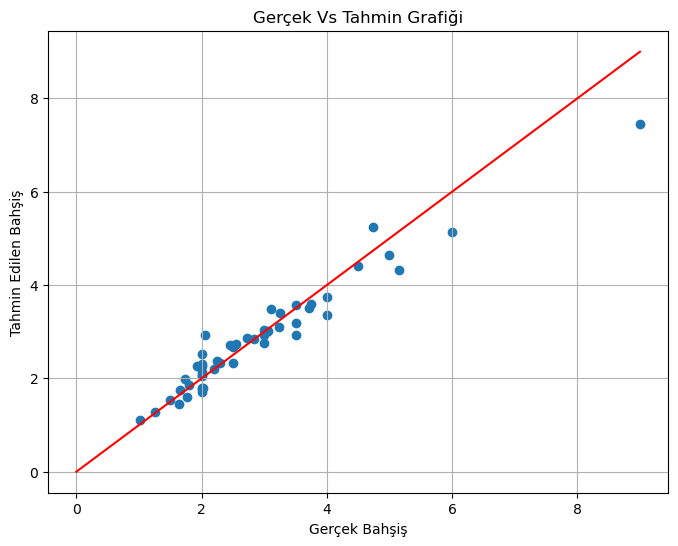

In [62]:
plt.figure(figsize=(8,6))
plt.scatter(y_test,y_pred)
plt.xlabel("Gerçek Bahşiş")
plt.ylabel("Tahmin Edilen Bahşiş")
plt.title("Gerçek Vs Tahmin Grafiği")
plt.plot([0, max(y_test)],[0 , max(y_test)], color = "red")
plt.grid(True)
plt.show()